In [ ]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
# IMPORT DEL TRANSFORMER DI RICONOSCIMENTO LINGUA (INGLESE)
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
import wordnet as wn


c:\Users\Nauel\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:588: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(


ModuleNotFoundError: No module named 'googletrans'

In [ ]:
PATH_INPUT = r"C:\Users\Nauel\Desktop\Lavoro UNI\data\input"
PATH_OUTPUT = r"C:\Users\Nauel\Desktop\Lavoro UNI\data\output"
PATH_CHECKPOINTS = r"C:\Users\Nauel\Desktop\Lavoro UNI\Checkpoints"

In [181]:
import fitz
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy import spatial
from googletrans import Translator
import glob
import os

In [163]:
# Download the stopwords corpus if needed
nltk.download('stopwords')
nltk.download('punkt')

# Open the PDF file in binary mode
with open(f'{PATH_INPUT}/Lavoro_ok-1.pdf', 'rb') as f:    #things to remove/add
    # Create a PyMuPDF document object
    pdf_doc = fitz.open('pdf', f.read())

    # Extract text from all pages
    text = ""
    for page in pdf_doc:
        text += page.get_text()

    # Tokenize the text and remove stopwords
    additional_stopwords = ["d", "pag", "vai"]      #things to remove/add
    stop_words = set(stopwords.words('italian'))    #things to remove/add
    stop_words.update(additional_stopwords)         #things to remove/add
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]

    # Count the frequency of each word
    word_counts = Counter(words)

    # Print the top 10 most common words
    top_words = word_counts.most_common(100)
    for word, count in top_words:
        pass

word_list = []

for word, count in top_words:
    word_list.append(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nauel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nauel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


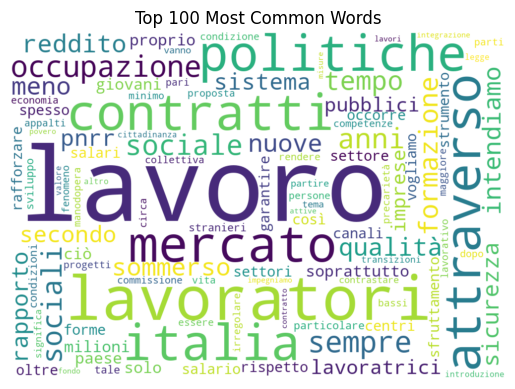

In [164]:
# Count the frequency of each word
word_counts = Counter(words)

# Create a word cloud of the top N most common words
top_n = 100
top_words = word_counts.most_common(top_n)
wordcloud = WordCloud(width=1000, height=700, background_color='white').generate_from_frequencies(dict(top_words))

# Plot the word cloud
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title(f'Top {top_n} Most Common Words')
plt.show()

In [165]:
# TRADUZIONE DELLA LISTA DELLE ESPRESSIONI
from deep_translator import GoogleTranslator

word_list_eng = []
for i in range(len(word_list)):
    translated = GoogleTranslator(source='italian', target='english').translate(word_list[i])
    word_list_eng.append(translated)
    
[x.upper() for x in word_list_eng]

['WORK',
 'WORKERS',
 'ITALY',
 'CONTRACTS',
 'POLICIES',
 'MARKET',
 'THROUGH',
 'OCCUPATION',
 'ALWAYS',
 'SOCIAL',
 'YEARS',
 'SOCIAL',
 'TRAINING',
 'TIME',
 'INCOME',
 'NEW',
 'SUBMERGED',
 'QUALITY',
 'LESS',
 'WE MEAN',
 'SECOND',
 'SYSTEM',
 'PNRR',
 'SAFETY',
 'RELATIONSHIP',
 'FEMALE WORKERS',
 'PUBLIC',
 'BUSINESSES',
 'ABOVE ALL',
 'THAT IS',
 'MILLIONS',
 'YOUNG',
 'OWN',
 'ALONE',
 'VILLAGE',
 'WAGE',
 'SECTORS',
 'IT IS NECESSARY',
 'STRENGTHEN',
 'CENTERS',
 'INSTRUMENT',
 'LIKE THIS',
 'OFTEN',
 'FORMS',
 'RESPECT',
 'SECTOR',
 'EXPLOITATION',
 'WE WANT',
 'GUARANTEE',
 'BEYOND',
 'WAGES',
 'CHANNELS',
 'PARTICULAR',
 'DEVELOPMENT',
 'CONDITIONS',
 'FOREIGNERS',
 'SUCH',
 'MINIMUM',
 'PROPOSAL',
 'SET OFF',
 'EVEN',
 'ABOUT',
 'AFTER',
 'COMMISSION',
 'GIVE',
 'SKILLS',
 'COLLECTIVE',
 'LABOR',
 'CONDITION',
 'CONTRACTS',
 'TO BE',
 'LIFE',
 'PROJECTS',
 'BASS',
 'GREATER',
 'PRECARIOUSNESS',
 'ECONOMY',
 'WORKING',
 'PHENOMENON',
 'IRREGULAR',
 'PEOPLE',
 'COUNTER',
 

In [166]:
word_list_eng = pd.Series(word_list_eng)

In [167]:
from scipy import spatial

# Define a function to get the vector representation of an expression
def get_vector(expression, model):
    vector = model.encode(expression)
    return vector

# Define the series of expressions
expressions = pd.Series(word_list_eng)
# Compute the vectors for each expression
vectors = expressions.apply(get_vector, model=model)

# Compute the cosine similarity distances between each vector and the vector for the word "man"
man_vector = get_vector('man male guy sir boy,', model=model)
distances_man = vectors.apply(lambda x: 1 - spatial.distance.cosine(x, man_vector))

# Compute the cosine similarity distances between each vector and the vector for the word "woman"
woman_vector = get_vector('woman lady female girl', model=model)
distances_woman = vectors.apply(lambda x: 1 - spatial.distance.cosine(x, woman_vector))

# Compute the cosine similarity distances between each vector and the vector for the word "woman"
person_vector = get_vector('person human', model=model)
distances_person = vectors.apply(lambda x: 1 - spatial.distance.cosine(x, person_vector))

# Create a dictionary with the expression as the key and the distances as the values
results = pd.DataFrame({'MAN': distances_man, 'WOMAN': distances_woman, "PERSON": distances_person})

In [168]:
pd.set_option("display.max_rows", None)
# Get the column name with the highest value for each row (excluding the 'list_of_words' column)
max_col = results[['MAN', 'WOMAN', 'PERSON']].idxmax(axis=1)

# Extract the gender from the column name
associated_word = max_col.apply(lambda x: x.lower())

# Add the 'associated_word' column to the DataFrame
results['associated_word'] = associated_word
results['word_list_ita'] = word_list
results['word_list_eng'] = word_list_eng            #things to remove/add
results.head(50)

,MAN,WOMAN,PERSON,associated_word,word_list_ita,word_list_eng
0,0.123091,0.109614,0.227725,person,lavoro,Work
1,0.115933,0.154082,0.259622,person,lavoratori,workers
2,0.104960,0.141225,0.176151,person,italia,Italy
3,0.096712,0.024419,0.179864,person,contratti,contracts
4,0.078060,0.058786,0.105065,person,politiche,policies
5,0.155610,0.144567,0.177177,person,mercato,market
6,0.112833,0.099835,0.156846,person,attraverso,through
7,0.195187,0.206163,0.345114,person,occupazione,occupation
8,0.109928,0.049936,0.087603,man,sempre,Always
9,0.190973,0.215137,0.268944,person,sociali,social


In [169]:
results.to_csv(f"{PATH_OUTPUT}/PD_lavoro.csv", sep = "|", index = False)

In [170]:
results.associated_word.value_counts(normalize=True)

person    0.79
man       0.18
woman     0.03
Name: associated_word, dtype: float64

In [71]:
results = pd.read_csv(f"{PATH_OUTPUT}/democrats.csv", sep = "|")

In [190]:
# Get a list of all CSV files in the directory
csv_files = glob.glob(PATH_OUTPUT + "/*.csv")

# Initialize an empty list to store the counts for each column
counts = []

# Loop through each CSV file
for csv_file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file, sep= "|") # replace arg1, arg2, arg3 with the appropriate arguments
    
    # Get the name of the CSV file
    file_name = os.path.basename(csv_file)
    # Loop through each column in the DataFrame
        # Get the count of unique values in the column and append it to the counts list
    column_counts = df['associated_word'].value_counts(normalize=True)
    column_counts.name = file_name
    counts.append(column_counts)
        
# Concatenate the counts list into a single DataFrame
counts_df = pd.concat(counts, axis=1)


In [193]:
counts_df.to_csv(f"{PATH_OUTPUT}/summary.csv", sep = "|", index = False)